# Representing groups of spike trains as sparse events
Alex Tait 8/31/2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nengo.utils.matplotlib import rasterplot

import sys
sys.path.append('../../nengo_soen')  # change this based on location of event_based.py

from event_based import EventBasedProbe

<AxesSubplot:>

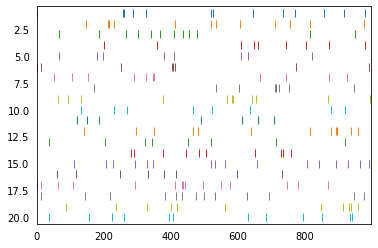

In [2]:
nt = 1000  # time steps
nneu = 20  # neurons
sparsity = 0.01

# Serves the role of synapses and neurons
dense_spikes = np.random.choice(2, size=(nt, nneu), p=[1-sparsity, sparsity])
rasterplot(np.arange(nt), dense_spikes)

## Compression

In [3]:
evs = EventBasedProbe(channels=nneu, use_numba=False)
for it in range(nt):
    results_of_some_simulation_timestep = dense_spikes[it, :]
    evs.step(results_of_some_simulation_timestep)

print(evs.ticker)
print(evs.event_dtype)
# print(record['time'])
print(evs.event_buffer)
# print(dense_spikes)

[0 3 3 ... 0 0 0]
[('time', '<i4'), ('chan', '<i4'), ('data', '<f4')]
[(  0,  0, 1.) (  0,  5, 1.) (  0, 16, 1.) ( 12,  5, 1.) ( 13, 16, 1.)
 ( 13, 17, 1.) ( 36, 19, 1.) ( 38, 12, 1.) ( 52,  6, 1.) ( 61, 15, 1.)
 ( 65,  8, 1.) ( 65, 16, 1.) ( 67,  2, 1.) ( 67,  4, 1.) ( 88, 18, 1.)
 ( 93,  8, 1.) (106,  6, 1.) (110, 16, 1.) (111, 14, 1.) (117, 15, 1.)
 (121, 10, 1.) (134,  8, 1.) (134,  9, 1.) (141, 11, 1.) (145, 17, 1.)
 (146,  1, 1.) (149, 10, 1.) (152,  6, 1.) (157, 19, 1.) (172,  7, 1.)
 (180,  4, 1.) (187,  2, 1.) (187, 10, 1.) (199,  4, 1.) (200,  3, 1.)
 (204, 12, 1.) (208, 14, 1.) (214,  1, 1.) (217,  1, 1.) (219, 17, 1.)
 (226, 19, 1.) (227, 14, 1.) (230,  1, 1.) (231,  9, 1.) (238, 18, 1.)
 (250, 15, 1.) (252,  5, 1.) (258,  0, 1.) (260,  0, 1.) (261, 19, 1.)
 (268,  2, 1.) (269,  9, 1.) (283, 13, 1.) (287,  0, 1.) (290, 13, 1.)
 (291,  6, 1.) (294, 14, 1.) (295, 16, 1.) (298, 11, 1.) (304,  2, 1.)
 (324, 12, 1.) (326,  6, 1.) (328,  0, 1.) (329, 14, 1.) (329, 18, 1.)
 (333, 

In [4]:
print(dense_spikes.nbytes)
print(evs.event_buffer.nbytes + evs.ticker.nbytes)

160000
7936


## Decompression

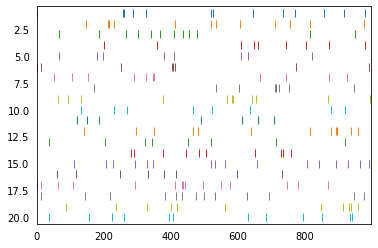

In [6]:
rasterplot(np.arange(nt), evs.todense())
# Test correctness
assert np.all(np.abs(evs.todense() - dense_spikes) == 0.)  # correctness
# Test slicing
assert np.all(np.abs(evs[200:5:400] - dense_spikes[200:5:400]) == 0.)